In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load the Dataset
data = pd.read_csv("/content/Advertising.csv")
print(data.head())


   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [4]:
# Step 3: Check for Missing Values and Info
print(data.info())
print(data.describe())
print("Missing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400

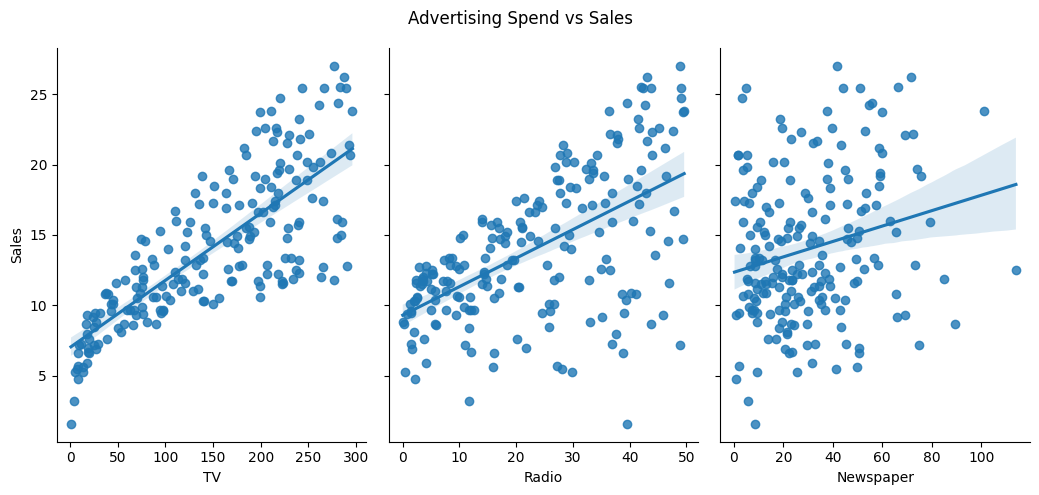

In [5]:
# Step 4: Visualize Relationships
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7, kind='reg')
plt.suptitle("Advertising Spend vs Sales")
plt.tight_layout()
plt.show()


In [6]:
# Step 5: Prepare the Data
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']                      # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 6: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [8]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033
Model Coefficients: [0.04472952 0.18919505 0.00276111]
Intercept: 2.979067338122629


In [9]:
# Step 8: Predict on New Advertising Data
new_data = pd.DataFrame({
    'TV': [150],
    'Radio': [20],
    'Newspaper': [15]
})
predicted_sales = model.predict(new_data)
print(f"Predicted Sales: {predicted_sales[0]:.2f} units")


Predicted Sales: 13.51 units
